In [1]:
import cv2
print(cv2.__version__)
import torch
from torch import nn
import torchvision
from PIL import Image
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt


4.8.1


### Preparando modelos

In [2]:

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
random_array_forest = random.sample(range(1, 151), 100)
random_array_noforest = random.sample(range(1, 151), 100)

print(len(random_array_forest))
print(len(random_array_noforest))

100
100


In [4]:

# Load Model
path = './models/ViT_Satellite.pth'
# 1. Get pretrained weights for ViT-Base
model_weights = torchvision.models.ViT_B_16_Weights.DEFAULT # requires torchvision >= 0.13, "DEFAULT" means best available


# Get automatic transforms from pretrained ViT weights
transform_im = model_weights.transforms()

# 2. Setup a ViT model instance with pretrained weights
model = torchvision.models.vit_b_16(weights=model_weights).to(device)


# 3. Freeze the base parameters
for parameter in model.parameters():
    parameter.requires_grad = False

# 4. Change the classifier head (set the seeds to ensure same initialization with linear head)
model.heads = nn.Linear(in_features=768, out_features=10).to(device)
model.load_state_dict(torch.load(path, map_location=device))

<All keys matched successfully>

### VIT_B 

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 3.00 %


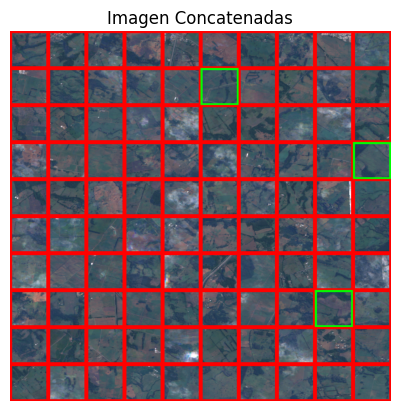

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 10.00 %


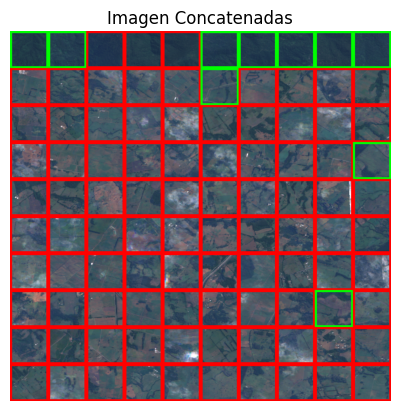

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 18.00 %


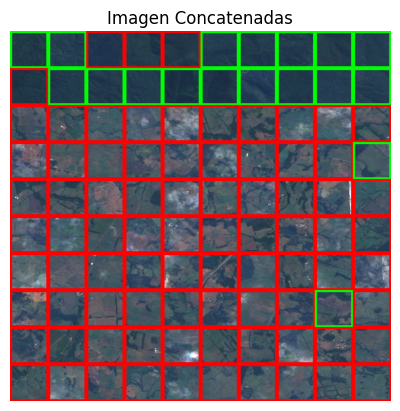

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 25.00 %


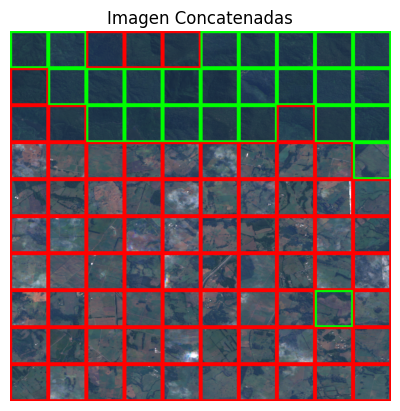

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 30.00 %


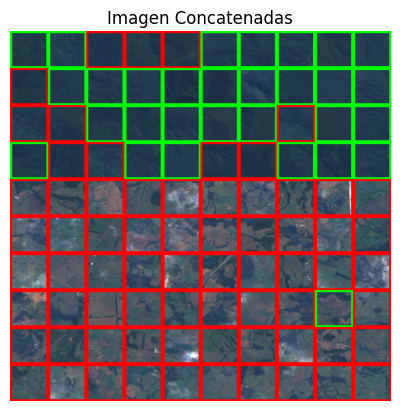

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 37.00 %


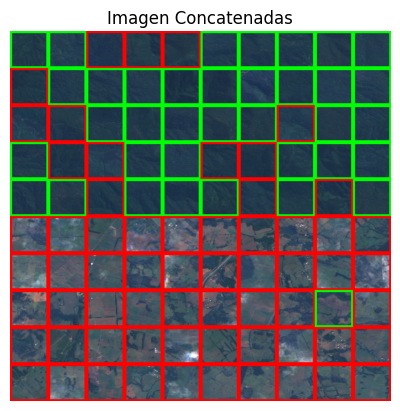

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 44.00 %


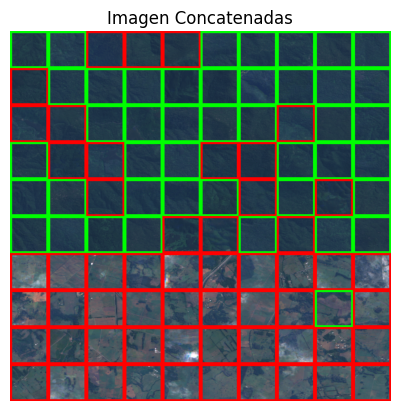

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 50.00 %


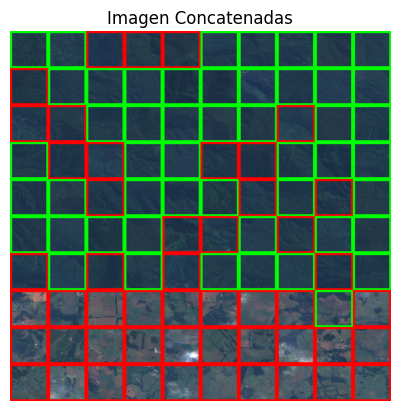

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 56.00 %


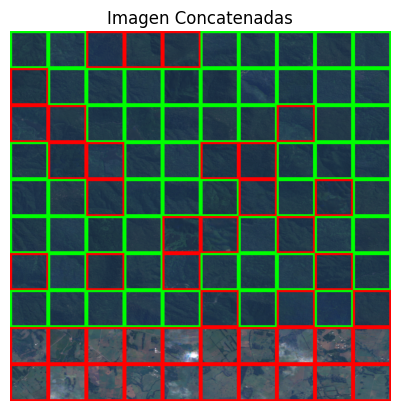

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 62.00 %


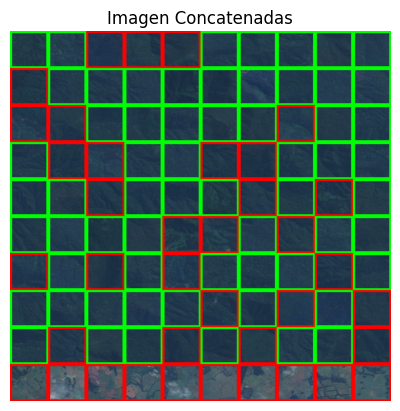

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 70.00 %


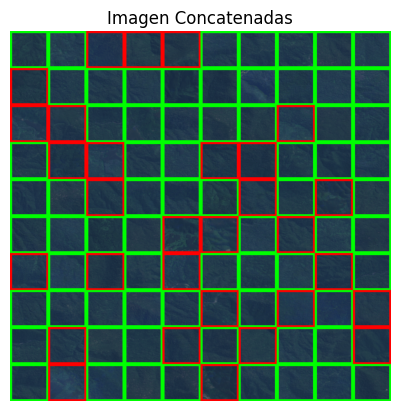

In [5]:
for paso in range(0, 101, 10):
    
    total = []
    model.eval()
    forest = 0
    for i, number in enumerate(random_array_noforest):
        
        if(i < paso):
            ruta_carpeta_imagenes = "./subimages/forest/"
            nombre_imagen = f"forest_{number}.png"
            ruta_imagen = f"{ruta_carpeta_imagenes}/{nombre_imagen}"
        else:
            ruta_carpeta_imagenes = "./subimages/noforest/"
            nombre_imagen = f"noforest_{number}.png"
            ruta_imagen = f"{ruta_carpeta_imagenes}/{nombre_imagen}"
        imagen = cv2.imread(ruta_imagen)
        
        if imagen is not None:
            pil_image = Image.fromarray(imagen)
            tensor_im  = transform_im(pil_image).unsqueeze(0)     
            with torch.no_grad():
                outputs = model(tensor_im.to(device))
                
                # Convert raw output scores to probabilities
                probabilities = F.softmax(outputs, dim=1)
                
                # Get the predicted class and its probability
                _, preds = torch.max(outputs, 1)
                pred_class = preds.item()
                pred_prob = probabilities[0][pred_class].item()
                #print(f"Predicted class: {class_id_to_label[pred_class]}, Probability: {pred_prob * 100:.2f}%")
            
                if pred_class == 1:
                    color_rectangulo = (0, 255, 0)  
                    grosor_linea = 10
                    coordenadas_inicio = (0, 0)  
                    coordenadas_fin = (imagen.shape[1], imagen.shape[0]) 
                    cv2.rectangle(imagen, coordenadas_inicio, coordenadas_fin, color_rectangulo, grosor_linea)
                    forest += 1
                else:
                    color_rectangulo = (0, 0, 255)  
                    grosor_linea = 10
                    coordenadas_inicio = (0, 0)  
                    coordenadas_fin = (imagen.shape[1], imagen.shape[0]) 
                    cv2.rectangle(imagen, coordenadas_inicio, coordenadas_fin, color_rectangulo, grosor_linea)
            
        
            total.append(imagen)


    percent = forest*100/len(total)
    if len(total) == 100:
        print(f"[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques  [{paso}%]: {percent:.2f} %")
    else:
        print("Hubo un problema al cargar las imágenes.")


    imagen_concatenada = cv2.vconcat([cv2.hconcat(total[i*10:(i+1)*10]) for i in range(10)])
    # Mostrar la imagen con Matplotlib
    plt.imshow(cv2.cvtColor(imagen_concatenada, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Concatenadas")
    plt.axis('off')  # Opcional: desactivar los ejes
    plt.show()

### ViT Binario

In [6]:
# Load Model
path = './models/ViT_Binary_Satellite.pth'
# 1. Get pretrained weights for ViT-Base
model_weights = torchvision.models.ViT_B_16_Weights.DEFAULT # requires torchvision >= 0.13, "DEFAULT" means best available


# Get automatic transforms from pretrained ViT weights
transform_im = model_weights.transforms()

# 2. Setup a ViT model instance with pretrained weights
model = torchvision.models.vit_b_16(weights=model_weights).to(device)


# 3. Freeze the base parameters
for parameter in model.parameters():
    parameter.requires_grad = False

# 4. Change the classifier head (set the seeds to ensure same initialization with linear head)
model.heads = nn.Linear(in_features=768, out_features=2).to(device)
model.load_state_dict(torch.load(path, map_location='cpu'))


<All keys matched successfully>

In [7]:
for paso in range(0, 101, 10):
    
    total = []
    model.eval()
    forest = 0
    for i, number in enumerate(random_array_noforest):
        
        if(i < paso):
            ruta_carpeta_imagenes = "./subimages/forest/"
            nombre_imagen = f"forest_{number}.png"
            ruta_imagen = f"{ruta_carpeta_imagenes}/{nombre_imagen}"
        else:
            ruta_carpeta_imagenes = "./subimages/noforest/"
            nombre_imagen = f"noforest_{number}.png"
            ruta_imagen = f"{ruta_carpeta_imagenes}/{nombre_imagen}"
        imagen = cv2.imread(ruta_imagen)
        
        if imagen is not None:
            pil_image = Image.fromarray(imagen)
            tensor_im  = transform_im(pil_image).unsqueeze(0)     
            with torch.no_grad():
                outputs = model(tensor_im.to(device))
                
                # Convert raw output scores to probabilities
                probabilities = F.softmax(outputs, dim=1)
                
                # Get the predicted class and its probability
                _, preds = torch.max(outputs, 1)
                pred_class = preds.item()
                pred_prob = probabilities[0][pred_class].item()
                #print(f"Predicted class: {class_id_to_label[pred_class]}, Probability: {pred_prob * 100:.2f}%")
            
                if pred_class == 0:
                    color_rectangulo = (0, 255, 0)  
                    grosor_linea = 10
                    coordenadas_inicio = (0, 0)  
                    coordenadas_fin = (imagen.shape[1], imagen.shape[0]) 
                    cv2.rectangle(imagen, coordenadas_inicio, coordenadas_fin, color_rectangulo, grosor_linea)
                    forest += 1
                else:
                    color_rectangulo = (0, 0, 255)  
                    grosor_linea = 10
                    coordenadas_inicio = (0, 0)  
                    coordenadas_fin = (imagen.shape[1], imagen.shape[0]) 
                    cv2.rectangle(imagen, coordenadas_inicio, coordenadas_fin, color_rectangulo, grosor_linea)
            
        
            total.append(imagen)


    percent = forest*100/len(total)
    if len(total) == 100:
        print(f"[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques  [{paso}%]: {percent:.2f} %")
    else:
        print("Hubo un problema al cargar las imágenes.")


    imagen_concatenada = cv2.vconcat([cv2.hconcat(total[i*10:(i+1)*10]) for i in range(10)])
    plt.imshow(cv2.cvtColor(imagen_concatenada, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Concatenadas")
    plt.axis('off')  # Opcional: desactivar los ejes
    plt.show()

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 7.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 15.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 23.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 27.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 32.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 40.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 46.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 51.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 58.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 63.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 66.00 %


### CNN multiclase

In [8]:
def create_effnetb0():
  # Get the weights and setup a model
  weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
  model = torchvision.models.efficientnet_b0(weights=weights).to(device)
  transform_im = weights.transforms()
  # Freeze the base model layers
  for param in model.features.parameters():
    param.requires_grad = False

  # Change the classifier head
  model.classifier = nn.Sequential(
      nn.Dropout(p=0.2, inplace=True),
      nn.Linear(in_features=1280, out_features=10)
  ).to(device)

  # Give the model a name
  model.name = "effnetb0"
  print(f"[INFO] Created new {model.name} model...")
  return model, transform_im



# Setup best model filepath
best_model_path = "models/07_effnetb0_data_10_percent_10_epochs.pth"

# Instantiate a new instance of EffNetB2 (to load in the saved state_dict())
model, transform_im = create_effnetb0()
model.to(device)
# Load the saved best model state_dict()
model.load_state_dict(torch.load(best_model_path, map_location=device))

[INFO] Created new effnetb0 model...


<All keys matched successfully>

In [9]:
class_id_to_label = {
    0: "ann_crop",
    1: "forest",
    2: "herb_veg",
    3: "highway",
    4: "industrial",
    5: "pasture",
    6: "perm_crop",
    7: "residential",
    8: "river",
    9: "sea_lake"
}
for paso in range(0, 101, 10):
    
    total = []
    model.eval()
    forest = 0
    for i, number in enumerate(random_array_noforest):
        
        if(i < paso):
            ruta_carpeta_imagenes = "./subimages/forest/"
            nombre_imagen = f"forest_{number}.png"
            ruta_imagen = f"{ruta_carpeta_imagenes}/{nombre_imagen}"
        else:
            ruta_carpeta_imagenes = "./subimages/noforest/"
            nombre_imagen = f"noforest_{number}.png"
            ruta_imagen = f"{ruta_carpeta_imagenes}/{nombre_imagen}"
        imagen = cv2.imread(ruta_imagen)
        
        if imagen is not None:
            pil_image = Image.fromarray(imagen)
            tensor_im  = transform_im(pil_image).unsqueeze(0)     
            with torch.no_grad():
                outputs = model(tensor_im.to(device))
                
                # Convert raw output scores to probabilities
                probabilities = F.softmax(outputs, dim=1)
                
                # Get the predicted class and its probability
                _, preds = torch.max(outputs, 1)
                pred_class = preds.item()
                pred_prob = probabilities[0][pred_class].item()
                #print(f"Predicted class {i}: {class_id_to_label[pred_class]}, Probability: {pred_prob * 100:.2f}%")
            
                if pred_class == 1:
                    color_rectangulo = (0, 255, 0)  
                    grosor_linea = 10
                    coordenadas_inicio = (0, 0)  
                    coordenadas_fin = (imagen.shape[1], imagen.shape[0]) 
                    cv2.rectangle(imagen, coordenadas_inicio, coordenadas_fin, color_rectangulo, grosor_linea)
                    forest += 1
                else:
                    color_rectangulo = (0, 0, 255)  
                    grosor_linea = 10
                    coordenadas_inicio = (0, 0)  
                    coordenadas_fin = (imagen.shape[1], imagen.shape[0]) 
                    cv2.rectangle(imagen, coordenadas_inicio, coordenadas_fin, color_rectangulo, grosor_linea)
            
        
            total.append(imagen)


    percent = forest*100/len(total)
    if len(total) == 100:
        print(f"[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques [{paso}%]: {percent:.2f} %")
    else:
        print("Hubo un problema al cargar las imágenes.")


    imagen_concatenada = cv2.vconcat([cv2.hconcat(total[i*10:(i+1)*10]) for i in range(10)])
    plt.imshow(cv2.cvtColor(imagen_concatenada, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Concatenadas")
    plt.axis('off')  # Opcional: desactivar los ejes
    plt.show()

[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 45.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 37.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 35.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 31.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 26.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 21.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 16.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 13.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 8.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 4.00 %
[INFO] Todas las imágenes se cargaron correctamente, porcentaje de bosques: 2.00 %
